In [1]:
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display
from scipy import signal
from scipy.fft import fftshift

In [2]:

Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray, reversed
FIG_SIZE = (8,3)

In [61]:
wavfile, read_start, read_end = ('D:/YYN/audio_/digitrec/segmented/YouYeNa/3/kdigits0-3.wav', 0.5, 1.5)
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr=None, mono='True')
print(x,x.shape)
Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
NFFT = int(2**(np.ceil(np.log2(Nf))))   
print('Fs = %d, Ns = %d, Nf = %d, NFFT = %d' % (Fs, Ns, Nf, NFFT))

[-3.0517578e-05  0.0000000e+00  1.5258789e-04 ... -7.0190430e-04
 -1.0375977e-03 -1.0681152e-03] (34774,)
Fs = 16000, Ns = 160, Nf = 320, NFFT = 512


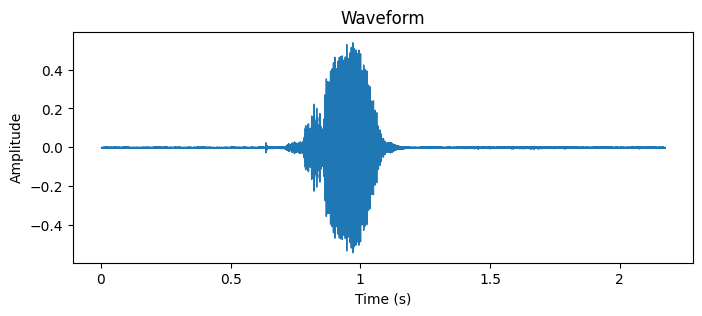

In [62]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

Text(0.5, 1.0, 'Waveform')

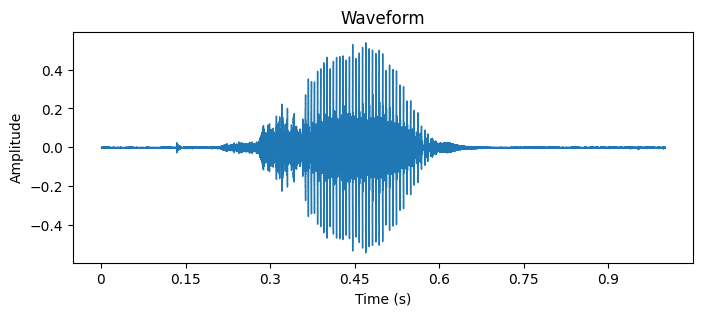

In [63]:
x, Fs = librosa.load(wavfile, sr=None, mono='True')
x = x[int(Fs*read_start):int(Fs*read_end)]

plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Spectrogram (dB)')

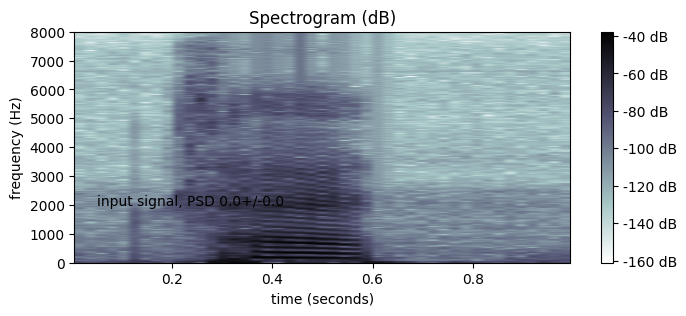

In [64]:
# draw spectrum by matplotlib
plt.figure(figsize=FIG_SIZE)
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(NFFT),
        NFFT=NFFT,noverlap=Ns,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

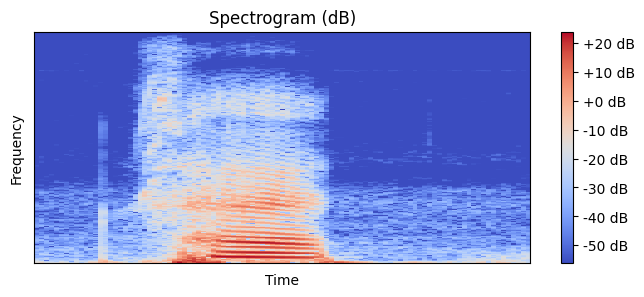

In [65]:
# draw spectrum by librosa
# STFT -> spectrogram
stft = librosa.stft(x, n_fft=NFFT, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

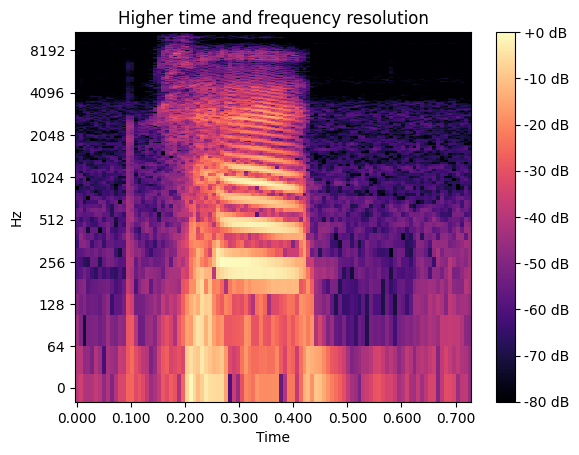

In [66]:
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=NFFT)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

(16000,) (256,) (71,) (256, 71)


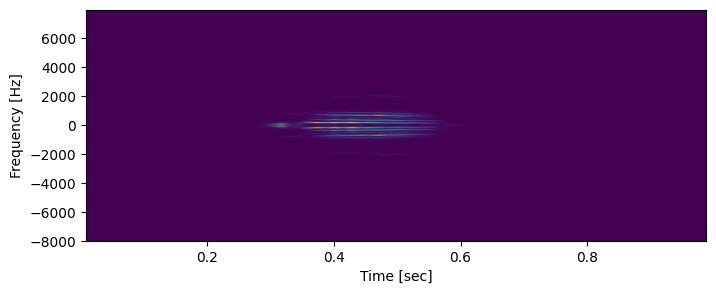

In [67]:
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
print(x.shape, f.shape, t.shape, Sxx.shape)
plt.figure(figsize=FIG_SIZE)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

(16000,) (256,) (71,) (256, 71)
(-8000.0, 7937.5)


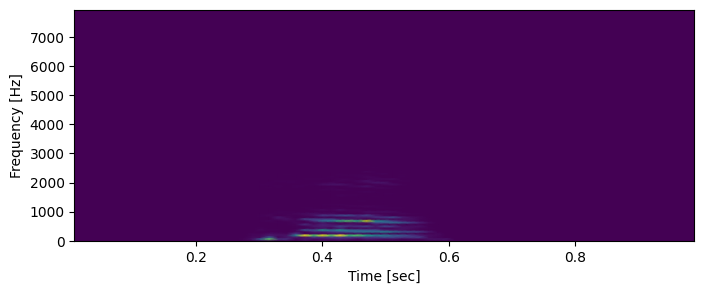

In [68]:
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
print(x.shape, f.shape, t.shape, Sxx.shape)
plt.figure(figsize=FIG_SIZE)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
ylim = plt.ylim()  # 현재 y축의 최소/최대값
print(ylim)
plt.ylim([0.0, ylim[1]])   # 0 Hz 부터
plt.show()

In [69]:
# 0.4~0.42 부분을 추출한다. 
y = x[int(Fs*0.4):int(Fs*0.42)]

[ -1.55020142 +0.j          -0.3477151  -0.85029567j
  -1.59026101 +0.65618877j  -0.1787541  -3.09337182j
  -0.32495519 -0.16795823j  -7.68782524-11.77311641j
 -11.82655757+13.62550533j   4.5295727  +0.08398614j
  -1.08704387 +4.58119596j  -0.25014871 -2.7322605j ]


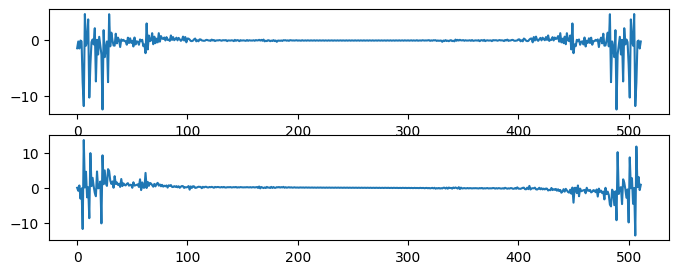

In [70]:
Y = np.fft.fft(y, n=NFFT)   # complex spectrum
print(Y[:10])
plt.figure(figsize=FIG_SIZE)
plt.subplot(2,1,1); plt.plot(Y.real)
plt.subplot(2,1,2); plt.plot(Y.imag)

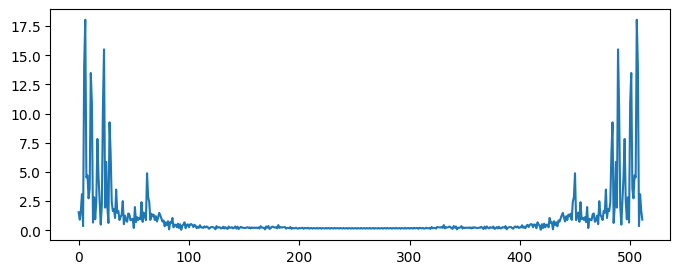

In [71]:
Y = np.abs(np.fft.fft(y, n=NFFT))
plt.figure(figsize=FIG_SIZE)
plt.plot(Y)

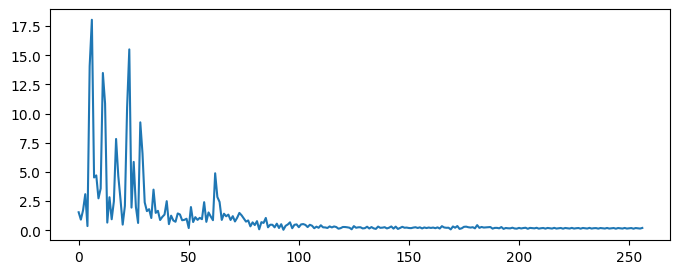

In [72]:
# 0~PI+1 까지의 절대값
Y = np.abs(np.fft.fft(y, n=NFFT))
Y = Y[:(len(Y)//2+1)]
plt.figure(figsize=FIG_SIZE)
plt.plot(Y)

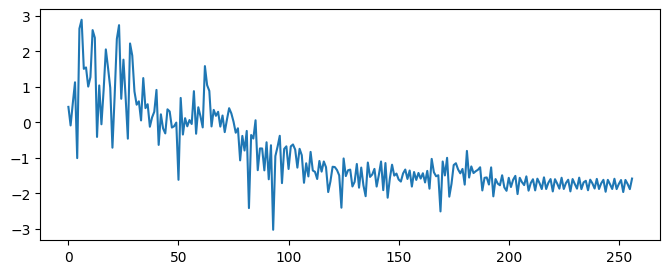

In [73]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y, n=NFFT)))
Y = Y[:(len(Y)//2+1)]
plt.figure(figsize=FIG_SIZE)
plt.plot(Y)

Text(0, 0.5, 'log magnitude')

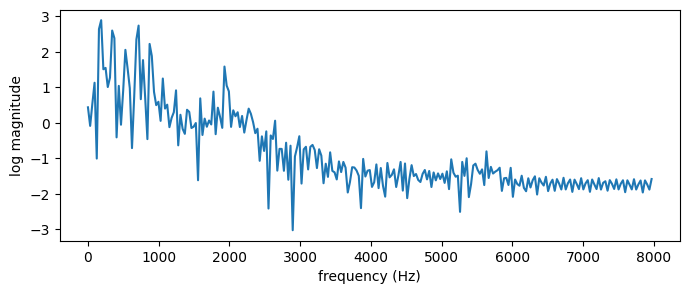

In [74]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y, n=NFFT)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.figure(figsize=FIG_SIZE)
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

In [75]:
# log function to prevent 0 input
def log_safe(x, epsilon=1e-10):
    return np.log(np.maximum(x,epsilon))

In [76]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf
#hNo = Nf//2+1
hNo = NFFT//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)], n=NFFT)
    X[:,i] = log_safe(np.abs(y[:hNo]))
print(X.shape)

(257, 50)


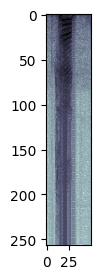

In [77]:

plt.figure(figsize=FIG_SIZE)
plt.imshow(X, cmap=cmap_plot)

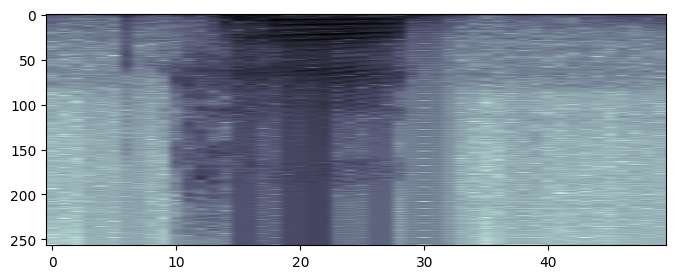

In [78]:
plt.figure(figsize=FIG_SIZE)
plt.imshow(X, cmap=cmap_plot, aspect='auto')

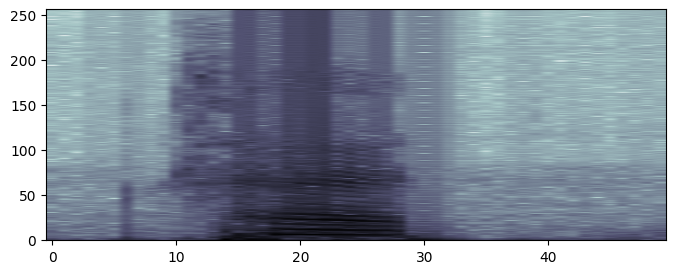

In [79]:
plt.figure(figsize=FIG_SIZE)
plt.imshow(X, cmap=cmap_plot, aspect='auto', origin='lower')

3.0072245490060108 -1.9604278037622433


Text(0, 0.5, 'frequency (Hz)')

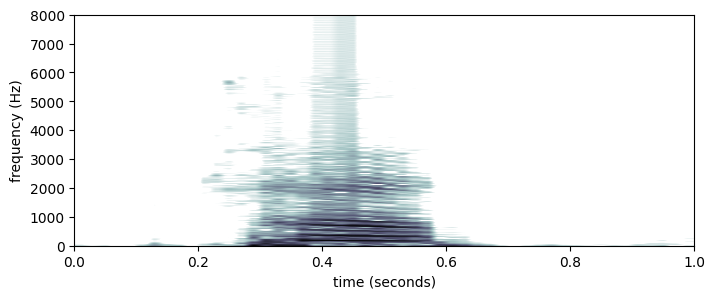

In [80]:
# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 80)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.figure(figsize=FIG_SIZE)
plt.imshow(X, cmap=cmap_plot, aspect='auto', origin='lower', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

In [84]:
def decibel_sq_safe(x, epsilon=1e-10):
    return 10*np.log10(np.maximum(np.real(x*np.conj(x)),epsilon))

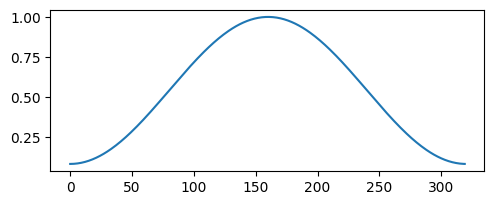

In [85]:
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
plt.figure(figsize=FIG_SIZE*np.array([0.7,0.7]))
plt.plot(win)

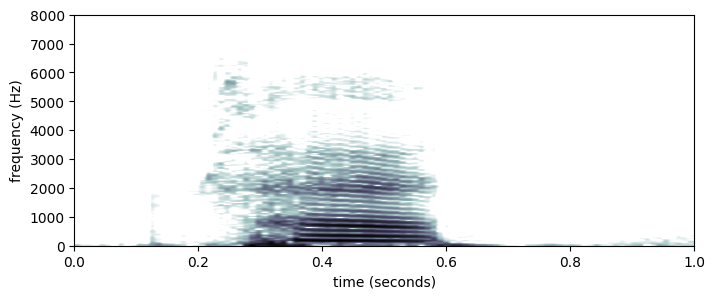

In [86]:
def drawspectrogram2(x, Nf, Ns=None, winname='hamming', minpercentile=80, isdbscale=True, isdraw=True):
    # Short-time Fourier transform with half-overlap 
    # Nf: analysis size
    # Ns: shift size 
    # NFFT: FFT size, power of 2
    if Ns==None: Ns=Nf//2
    num_frames = (len(x)-Nf)//Ns+1 
    NFFT = int(2**(np.ceil(np.log2(Nf))))  
    hNo = NFFT//2+1
    X = np.zeros((hNo,num_frames))
    
    # generate window
    if winname=='rect' or winname=='rectangular':
        win = np.ones(Nf)
    else:   # hamming, hann, etc.
        win = librosa.filters.get_window(winname, Nf, fftbins=True)
        
    # STFT
    for i in range(num_frames):
        y = np.fft.fft(win*x[(i*Ns):(i*Ns+Nf)], n=NFFT)
        y = y[:hNo]
        if isdbscale: y = decibel_sq_safe(y)
        else: y = np.abs(y)
        X[:,i] = y

    if isdraw:
        # 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
        vmax = np.max(X[:])
        vmin = np.percentile(X[:], minpercentile)
        specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
        plt.imshow(X, cmap=cmap_plot, aspect='auto', origin='lower', extent=specgram_axis, vmax=vmax, vmin=vmin)
        plt.xlabel('time (seconds)')
        plt.ylabel('frequency (Hz)')
    
    return X

plt.figure(figsize=FIG_SIZE)
X = drawspectrogram2(x, Nf, Ns, 'hamming')

Text(0.5, 1.0, 'hamming window')

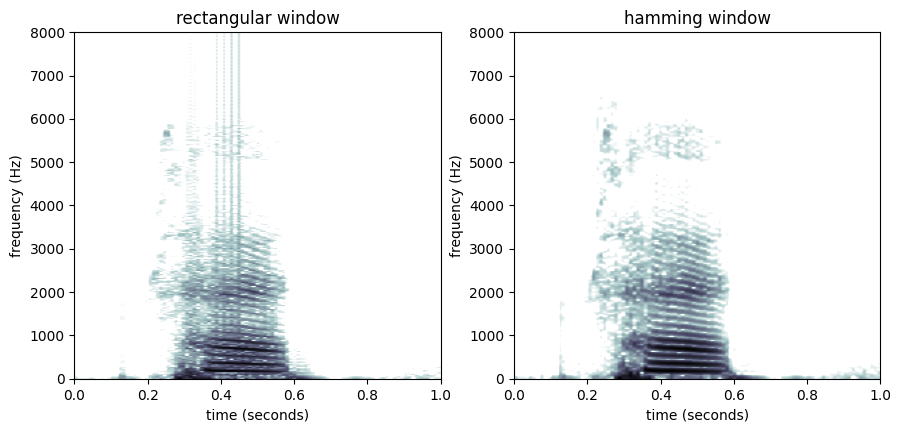

In [87]:
# 비교를 위해 같이 그린다
plt.figure(figsize=FIG_SIZE*np.array([1.3,1.5]))
plt.subplot(1,2,1)
X = drawspectrogram2(x, Nf, Ns, 'rect')
plt.title('rectangular window')
plt.subplot(1,2,2)
X = drawspectrogram2(x, Nf, Ns, 'hamming')
plt.title('hamming window')